Debugging how SMARTS should look like can be quite challenging. THis is why I developed these fragmeneter_utils. On another note, it always helps to have a look on how rdkit implements the properties, sometimes things are unfortunately not so easy to grasp. I have opened several issues thinking they were bugs that turned out to be hard chemically to solve or design decisions. Especially, I think aromaticity is hard. (At least for me)
You can get more info from here:
https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html
https://greglandrum.github.io/rdkit-blog/posts/2023-05-26-drawing-options-explained.html


In [1]:
from IPython.display import display

from fragmenter import fragmenter
from fragmenter.utils import (
    draw_mol_with_highlights_and_legend,
    get_table_with_atom_properties_relevant_to_SMARTS,
)
from rdkit import Chem
from fragmenter.data import SMARTS_UNIFAC

/home/yu9824/projects/fragmentation_algorithm/src/fragmenter/_core.py:215: UserWarning: No especific fragmentation_scheme_order was given, you might get better results if you specify the order in which the groups are searched for.
  self.warnings.warn(


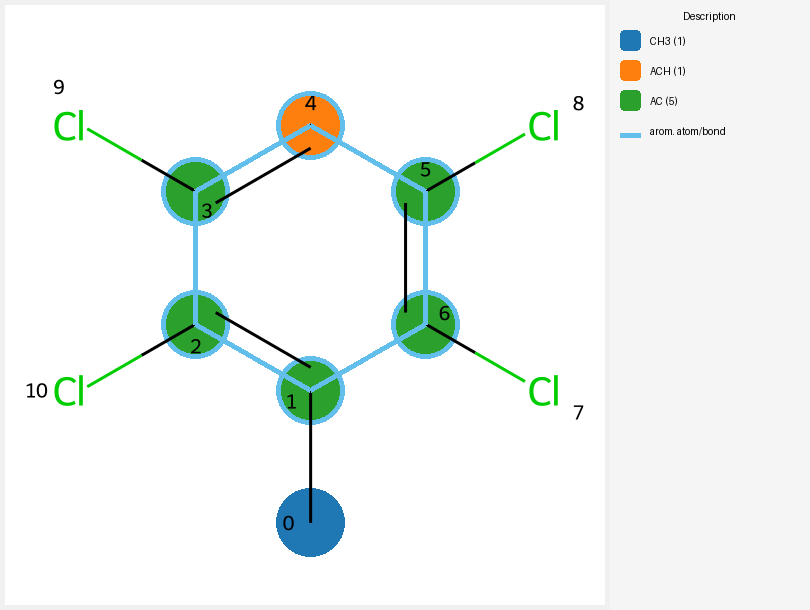

idx | Sym[AN] | Charge | Arom   | Degree | Tot. Hs | Impl. Hs | R. Count | R. Size | Val.   | Conn.  | R. Conn. | Chir. | CIP
    |         |        | /Aliph | (D<n>) | (H<n>)  | (h<n>)   | (R<n>)   | (r<n>)  | (v<n>) | (X<n>) | (x<n>)   |       |    
----+---------+--------+--------+--------+---------+----------+----------+---------+--------+--------+----------+-------+----
0   | C [6]   | 0      | A      | 1      | 3       | 3        | 0        |         | 4      | 4      | 0        | ✘     |    
1   | C [6]   | 0      | a      | 3      | 0       | 0        | 1        | (6,)    | 4      | 3      | 2        | ✘     |    
2   | C [6]   | 0      | a      | 3      | 0       | 0        | 1        | (6,)    | 4      | 3      | 2        | ✘     |    
3   | C [6]   | 0      | a      | 3      | 0       | 0        | 1        | (6,)    | 4      | 3      | 2        | ✘     |    
4   | C [6]   | 0      | a      | 2      | 1       | 1        | 1        | (6,)    | 4      | 3      | 2        | ✘   

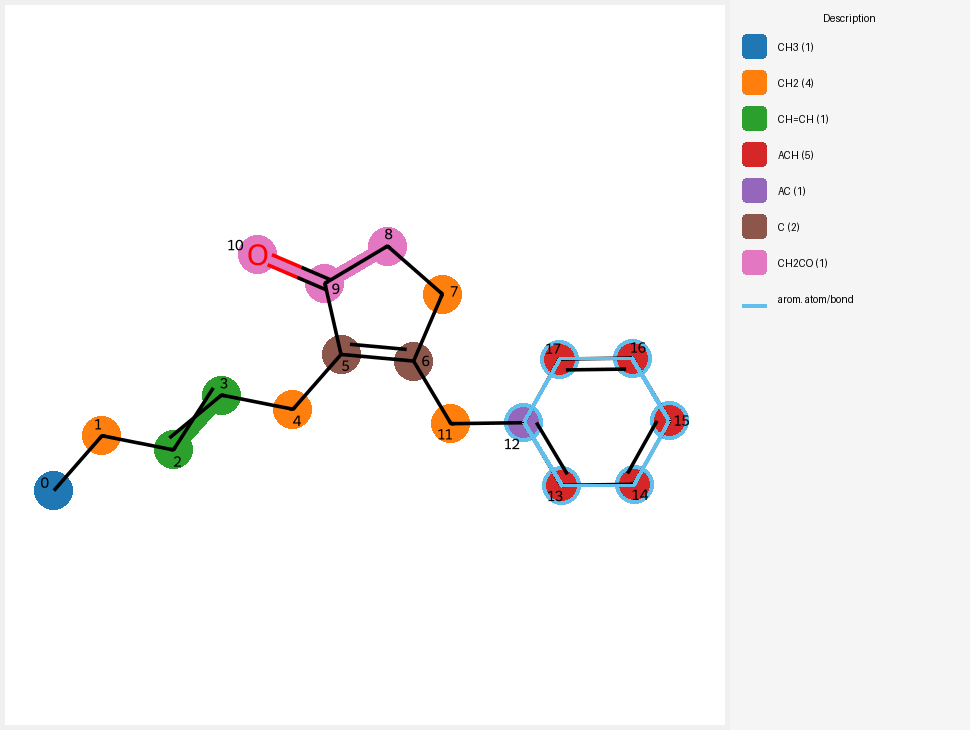

idx | Sym[AN] | Charge | Arom   | Degree | Tot. Hs | Impl. Hs | R. Count | R. Size | Val.   | Conn.  | R. Conn. | Chir. | CIP
    |         |        | /Aliph | (D<n>) | (H<n>)  | (h<n>)   | (R<n>)   | (r<n>)  | (v<n>) | (X<n>) | (x<n>)   |       |    
----+---------+--------+--------+--------+---------+----------+----------+---------+--------+--------+----------+-------+----
0   | C [6]   | 0      | A      | 1      | 3       | 3        | 0        |         | 4      | 4      | 0        | ✘     |    
1   | C [6]   | 0      | A      | 2      | 2       | 2        | 0        |         | 4      | 4      | 0        | ✘     |    
2   | C [6]   | 0      | A      | 2      | 1       | 1        | 0        |         | 4      | 3      | 0        | ✘     |    
3   | C [6]   | 0      | A      | 2      | 1       | 1        | 0        |         | 4      | 3      | 0        | ✘     |    
4   | C [6]   | 0      | A      | 2      | 2       | 2        | 0        |         | 4      | 4      | 0        | ✘   

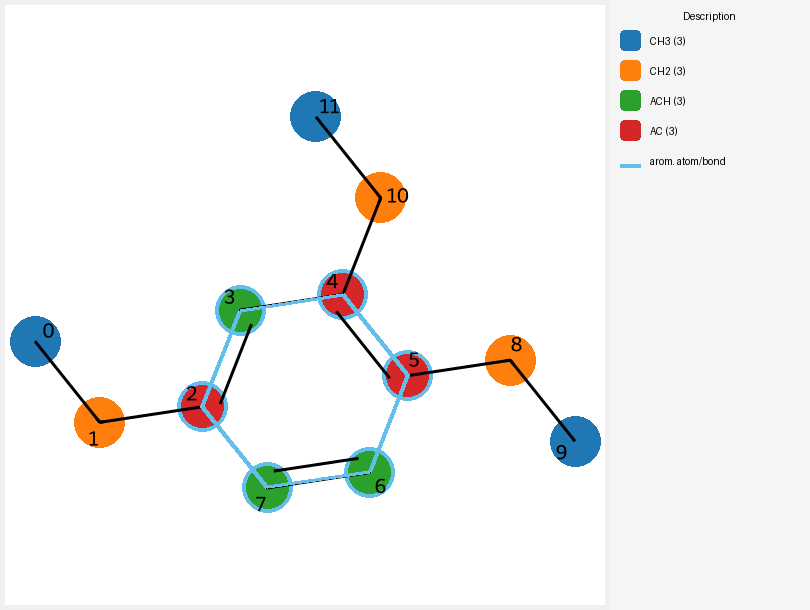

idx | Sym[AN] | Charge | Arom   | Degree | Tot. Hs | Impl. Hs | R. Count | R. Size | Val.   | Conn.  | R. Conn. | Chir. | CIP
    |         |        | /Aliph | (D<n>) | (H<n>)  | (h<n>)   | (R<n>)   | (r<n>)  | (v<n>) | (X<n>) | (x<n>)   |       |    
----+---------+--------+--------+--------+---------+----------+----------+---------+--------+--------+----------+-------+----
0   | C [6]   | 0      | A      | 1      | 3       | 3        | 0        |         | 4      | 4      | 0        | ✘     |    
1   | C [6]   | 0      | A      | 2      | 2       | 2        | 0        |         | 4      | 4      | 0        | ✘     |    
2   | C [6]   | 0      | a      | 3      | 0       | 0        | 1        | (6,)    | 4      | 3      | 2        | ✘     |    
3   | C [6]   | 0      | a      | 2      | 1       | 1        | 1        | (6,)    | 4      | 3      | 2        | ✘     |    
4   | C [6]   | 0      | a      | 3      | 0       | 0        | 1        | (6,)    | 4      | 3      | 2        | ✘   

In [2]:
fragmentation_scheme = {
    index: list(tup_smarts)
    for index, tup_smarts in enumerate(SMARTS_UNIFAC.values(), start=1)
}
group_names = {
    index: name for index, name in enumerate(SMARTS_UNIFAC.keys(), start=1)
}
simple_fragmenter = fragmenter(fragmentation_scheme, algorithm="simple")
# simple_fragmenter = fragmenter(
#     fragmentation_scheme,
#     algorithm="complete",
#     n_heavy_atoms_cuttoff=20,
#     function_to_choose_fragmentation=lambda x: x[0],
# )

for i, smiles in enumerate(
    [
        "CC1=C(C(=CC(=C1Cl)Cl)Cl)Cl",
        "CCC=CCC1=C(CCC1=O)Cc1ccccc1",
        "CCC1=CC(=C(C=C1)CC)CC",
    ]
):
    mol = Chem.MolFromSmiles(smiles)
    fragmentation, success, fragmentation_matches = simple_fragmenter.fragment(
        mol
    )

    img = draw_mol_with_highlights_and_legend(
        mol, fragmentation_matches, group_names
    )
    _, _, _, formatted_rows = (
        get_table_with_atom_properties_relevant_to_SMARTS(mol)
    )
    display(img)
    print("\n".join(formatted_rows))
